In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.DataFrame(index = np.arange(14) ,columns=np.arange(1150), data = 0.0)

1  -  kamera330.csv .  2  -  kamera302.csv .  3  -  kamera305.csv .  4  -  kamera307.csv .  5  -  kamera304.csv .  6  -  kamera308.csv .  7  -  kamera301.csv .  8  -  kamera304-1.csv .  9  -  2obj-kamera307.csv .  10  -  2obj-kamera308.csv .  11  -  2obj-kamera309.csv .  12  -  2obj-kamera310.csv .  13  -  kamera302-1.csv .  14  -  kamera303-1.csv . 


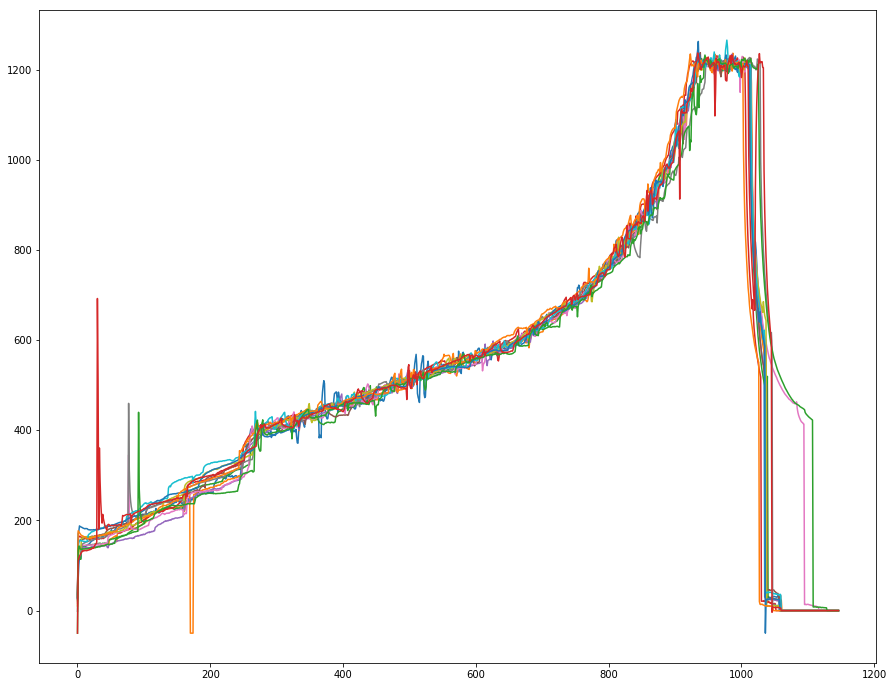

In [3]:
files = ('kamera330.csv','kamera302.csv','kamera305.csv','kamera307.csv', 'kamera304.csv', 'kamera308.csv', 
         'kamera301.csv','kamera304-1.csv', '2obj-kamera307.csv', '2obj-kamera308.csv','2obj-kamera309.csv',
         '2obj-kamera310.csv', 'kamera302-1.csv','kamera303-1.csv')
files1 = ('kamera330.csv','kamera303-1.csv')
z = 0 #номер файла в set - не нашел функцию, которая возвратит номер файла
plt.figure(figsize=(15,12))
for line in files:
    df = pd.read_csv(line, sep=";", header=0, encoding='cp1251') 
    old_names = [u'№', u'дата', u'время', u'миксер',u'°C']
    new_names = [u'number', u'date', u'time', u'mikser',u'kamera'] 
    df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
    df.kamera = df.kamera.str.replace(',','.') 
    df.kamera = pd.to_numeric(df.kamera, errors='raise', downcast=None)
    print z+1, ' - ', line,'. ',
    # поиск точки начала цикла
    porog = 45
    i=1
    while i < int(df.number[-18:-17]):
        if float(df.kamera[i])>porog:
            df.drop(range(i-5),axis=0,inplace=True)
            i = int(df.number[-18:-17])
        i += 1
    i=1 

    # снижение размера выборки в 50 раз
    razmer = 50
    start = df.kamera.index[0]
    
    for i in xrange(df.kamera.shape[0]): 
        if i%razmer==0:
            h = (i/razmer)+3
            data.iloc[z,h]=df.kamera[i+start]
    
    data.iloc[z,0]=line
    data.iloc[z,1]=pd.to_datetime(str(df.date[start]+' '+ df.time[start]))
    plt.plot(range(data.shape[1]-3), data.iloc[z][3:])
    z+=1
plt.savefig('temperatura_nagreva.pdf',bbox_inches='tight')

In [4]:
df1 = pd.DataFrame(index = np.arange(15) ,columns=np.arange(1150), data = 0.0)

In [5]:
meanline = []
meanline.append(data.mean())
meanline = np.array(meanline)

In [6]:
top_line=[]
bottom_line=[]
ideal_line=[]

for z in range(df1.shape[1]-3):
    if z <265:
        ideal = z*400.0/264.0
        top_line.append(ideal+25)
        bottom_line.append(ideal-50)
        ideal_line.append(ideal)
    elif z >= 265 and z < 466:
        ideal = 400+(z-265)*100.0/(466-264)
        izlom = (z-265)*25/(466-264)
        top_line.append(ideal+25)
        bottom_line.append(ideal-50+izlom)
        ideal_line.append(ideal)
    elif z >= 466 and z < 663:
        ideal = 500+(z-466)*100.0/(663-466)
        top_line.append(ideal+25)
        bottom_line.append(ideal-25)
        ideal_line.append(ideal)
    elif z >= 663 and z < 759:
        ideal = 600+(z-663)*100.0/(759-663)
        top_line.append(ideal+25)
        bottom_line.append(ideal-25)
        ideal_line.append(ideal)
    elif z >= 759 and z < 817:
        ideal = 700+(z-759)*100.0/(817-759)
        top_line.append(ideal+25)
        bottom_line.append(ideal-25)
        ideal_line.append(ideal)
    elif z >= 817 and z < 860:
        ideal = 800+(z-817)*100.0/(860-817)
        top_line.append(ideal+25)
        bottom_line.append(ideal-25)
        ideal_line.append(ideal)
    elif z >= 860 and z < 892:
        ideal = 900+(z-860)*100.0/(892-860)
        top_line.append(ideal+25)
        bottom_line.append(ideal-25)
        ideal_line.append(ideal)
    elif z >= 892 and z < 941:
        ideal = 1000+(z-892)*200.0/(941-892)
        top_line.append(ideal+25)
        bottom_line.append(ideal-25)
        ideal_line.append(ideal)
    elif z >= 941 and z < 1013:
        ideal = 1200
        top_line.append(ideal+25)
        bottom_line.append(ideal-25)
        ideal_line.append(ideal)
    else:
        top_line.append(meanline[0][z]+25)
        bottom_line.append(meanline[0][z]-50)
        ideal_line.append(meanline[0][z])
top_line = np.array(top_line)
bottom_line = np.array(bottom_line)
ideal_line = np.array(ideal_line)

In [7]:
df1 = pd.DataFrame(index = np.arange(15) ,columns=np.arange(1150), data = 0.0)

In [8]:
for z in range(df1.shape[0]-1):
    print z,
    for i in range(df1.shape[1]-3):
        df1.iloc[z][i]=data.iloc[z][i+3]-meanline[0][i+1]

0 1 2 3 4 5 6 7 8 9 10 11 12 13


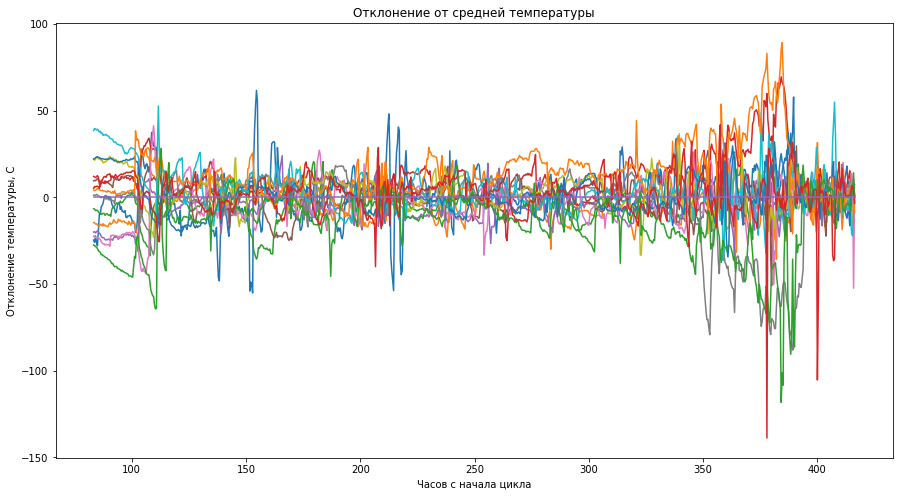

In [9]:
plt.figure(figsize=(15,8))
begin, end = 200, 1000
for z in range(df1.shape[0]):
    plt.plot(np.arange(begin, end,1)*25/60.0, df1.iloc[z][begin:end])
#print y    

plt.xlabel(u"Часов с начала цикла")
plt.ylabel(u'Отклонение температуры, C')
plt.title(u'Отклонение от средней температуры')
plt.savefig('otklonenie.pdf',bbox_inches='tight')

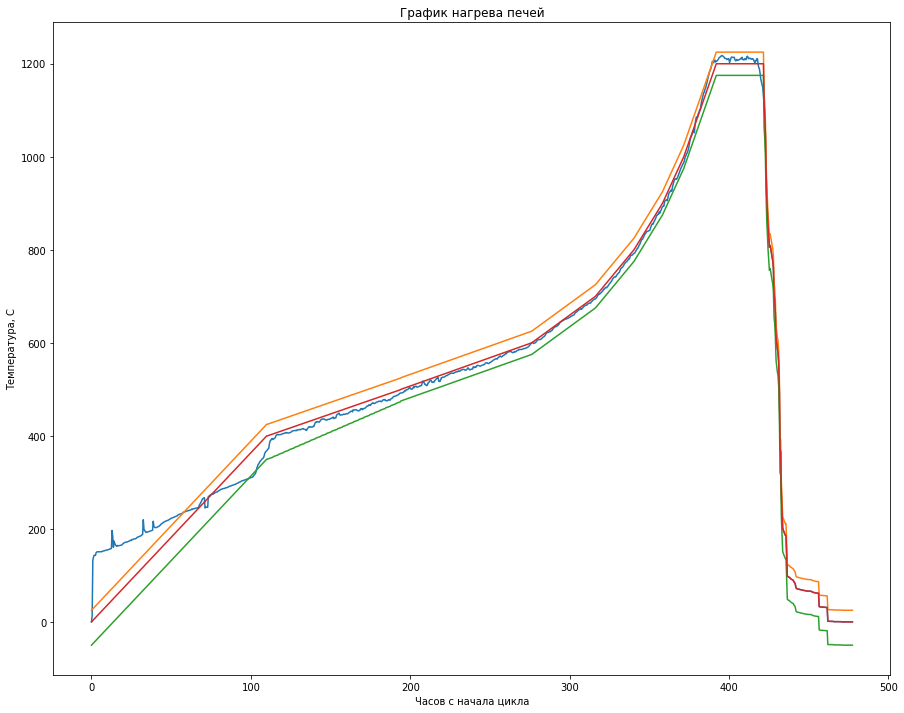

In [10]:
plt.figure(figsize=(15,12))
#for z in range(df1.shape[0]-1):
 #   plt.plot(np.arange(df1.shape[1]-3)*25/60.0, data.iloc[z][3:])
plt.plot(np.arange(df1.shape[1]-3)*25/60.0, meanline[0][:-1])    
plt.plot(np.arange(df1.shape[1]-3)*25/60.0, top_line)
plt.plot(np.arange(df1.shape[1]-3)*25/60.0, bottom_line)
plt.plot(np.arange(df1.shape[1]-3)*25/60.0, ideal_line)
plt.xlabel(u"Часов с начала цикла")
plt.ylabel(u'Температура, C')
plt.title(u'График нагрева печей')
plt.savefig('grafik_nagreva.pdf',bbox_inches='tight')

In [11]:
for z in range(df1.shape[0]-1):
    print z,
    for i in range(df1.shape[1]-3):
        df1.iloc[z][i]=round(data.iloc[z][i+3]-ideal_line[i])

0 1 2 3 4 5 6 7 8 9 10 11 12 13


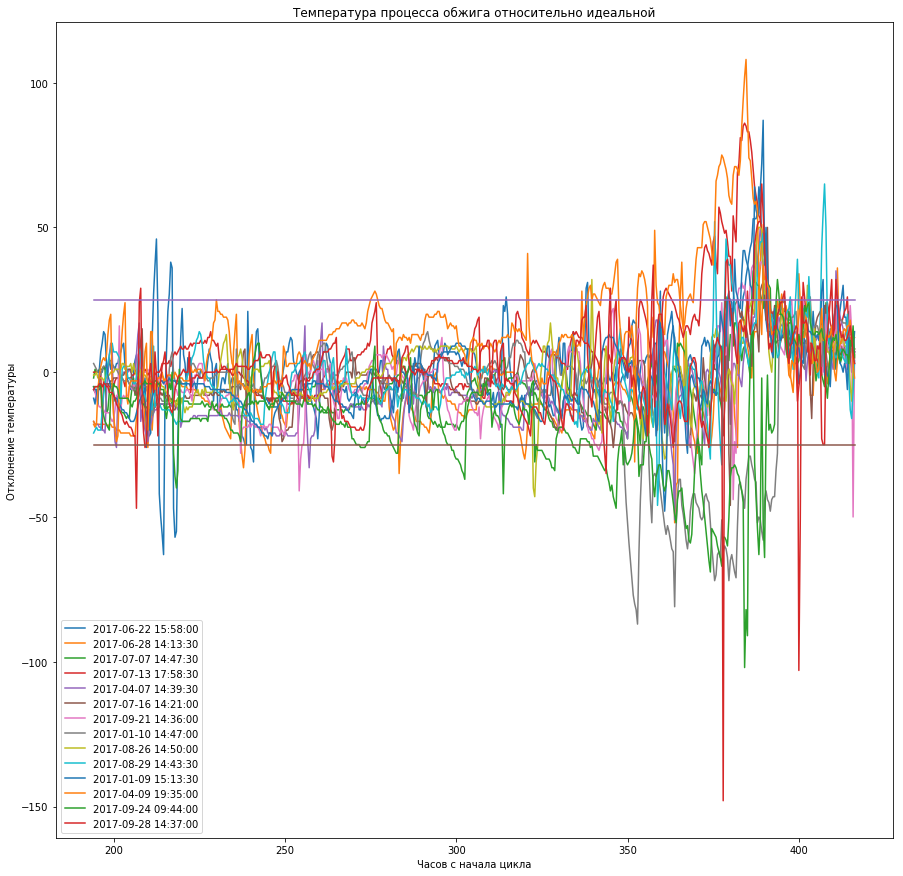

In [12]:
plt.figure(figsize=(15,15))
begin, end = 466, 1000
y1 = [25]
y2 = [-25]
for z in range(df1.shape[0]-1):
    plt.plot(np.arange(begin,end,1)*25/60.0, df1.iloc[z][begin:end])
plt.plot(np.arange(begin, end,1)*25/60.0, y1*(end-begin))
plt.plot(np.arange(begin, end,1)*25/60.0, y2*(end-begin))
plt.xlabel(u"Часов с начала цикла")
plt.ylabel(u'Отклонение температуры')
plt.title(u'Температура процесса обжига относительно идеальной')
plt.legend(data[1])
plt.savefig('temperatura_otnositelno idealinoi.pdf',bbox_inches='tight')

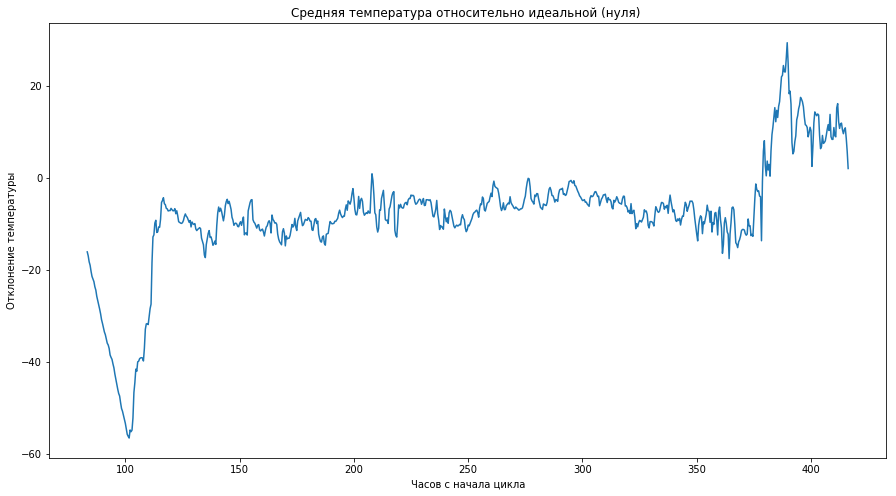

In [13]:
plt.figure(figsize=(15,8))
begin, end = 200, 1000
plt.plot(np.arange(begin,end)*25/60.0, meanline[0][begin:end]-ideal_line[begin:end]) 
plt.xlabel(u"Часов с начала цикла")
plt.ylabel(u'Отклонение температуры')
plt.title(u'Средняя температура относительно идеальной (нуля) ')
plt.savefig('srednyaya_temperatura.pdf',bbox_inches='tight')

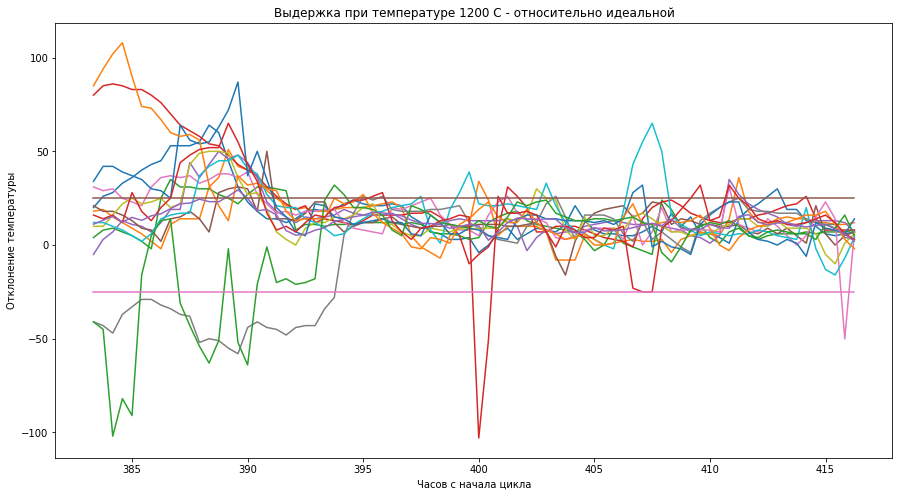

In [14]:
plt.figure(figsize=(15,8))
begin, end = 920, 1000
for z in range(df1.shape[0]-1):
    plt.plot(np.arange(begin,end)*25/60.0, df1.iloc[z][begin:end])   
plt.plot(np.arange(begin,end)*25/60.0, meanline[0][begin:end]-ideal_line[begin:end]) 
plt.plot(np.arange(begin, end,1)*25/60.0, y1*(end-begin))
plt.plot(np.arange(begin, end,1)*25/60.0, y2*(end-begin))
plt.xlabel(u"Часов с начала цикла")
plt.ylabel(u'Отклонение температуры')
plt.title(u'Выдержка при температуре 1200 С - относительно идеальной')
plt.savefig('vyderjka_pri_1200c.pdf',bbox_inches='tight')

In [ ]:
#ideal_line[264:268]